In [40]:
import torch
# import cv2
import math
# import Exception
from matplotlib import pyplot as plt
import numpy as np

In [49]:
data_dir = "/home/as14229/Shared/SuperGAN/data/gfpgan_test/"
image_dict = torch.load(data_dir+"gfpgan_image_stages.pth", map_location=torch.device('cpu'))

In [50]:
image_dict.keys()

dict_keys(['input', 'stages', 'output'])

In [64]:
images = image_dict['stages']
# image = torch.stack(image)
# print(image.shape)


In [61]:
for im in image:
    print(im[0].shape)

torch.Size([3, 8, 8])
torch.Size([3, 16, 16])
torch.Size([3, 32, 32])
torch.Size([3, 64, 64])
torch.Size([3, 128, 128])
torch.Size([3, 256, 256])
torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


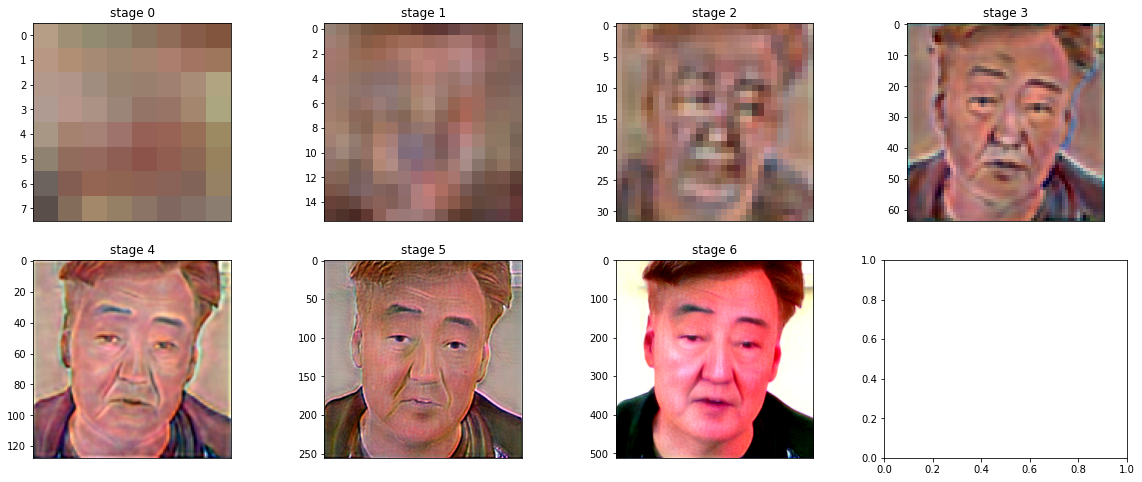

In [68]:
imlen = len(images)

fig, ax = plt.subplots(2,(math.ceil(imlen/2))+2, figsize=(20, 8))
ax = ax.ravel()

for i, (image) in enumerate(images):
    image = image.squeeze(0)
    ax[i].set_title("stage "+str(i))
    ax[i].set_xticks([])
    try:
        image_tensor = image.detach().clone()

        try:
            image_tensor *= 0.5
            image_tensor += 0.5
        except Exception as e:
            print(i,e)
            
        ax[i].imshow(image_tensor.permute(1, 2, 0));
    except Exception as e:
        print(i, e)
        ax[i].imshow(image)
    
plt.show()

stages 'list' object has no attribute 'detach'


/scratch/as14229/envs_dirs/GAN2/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x, subok=True, copy=copy)
/scratch/as14229/envs_dirs/GAN2/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

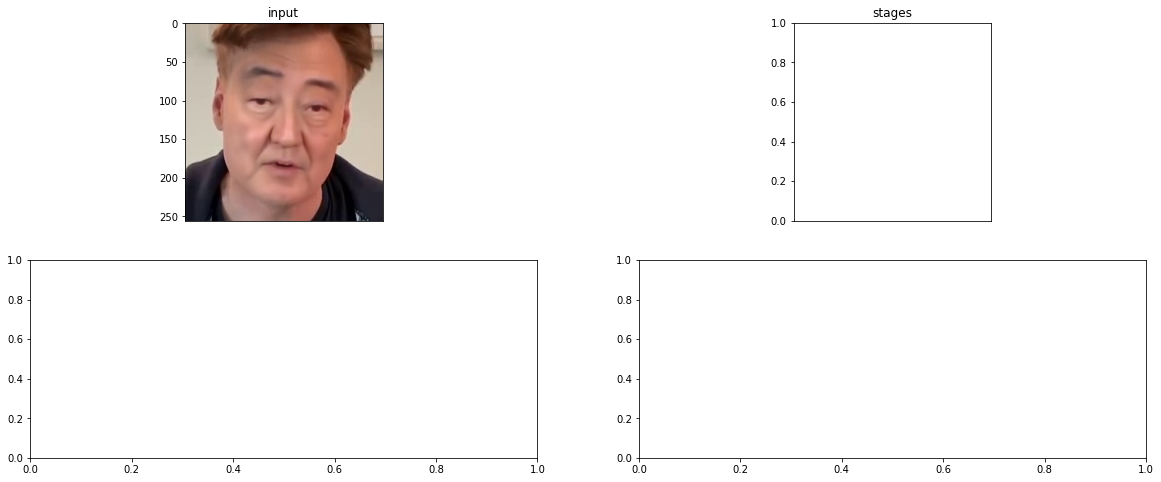

In [69]:
imlen = len(image_dict.keys())

fig, ax = plt.subplots(2,math.ceil(imlen/2), figsize=(20, 8))
ax = ax.ravel()

for i, (stage,image) in enumerate(image_dict.items()):
    ax[i].set_title(stage)
    ax[i].set_xticks([])
    try:
        image_tensor = image.detach().clone()

        try:
            image_tensor *= 0.5
            image_tensor += 0.5
        except Exception as e:
            print(stage,e)
            
        ax[i].imshow(image_tensor.permute(1, 2, 0));
    except Exception as e:
        print(stage, e)
        ax[i].imshow(image)
    
plt.show()